# Analyse et Prédiction du Risque de Diabète

Ce projet vise à segmenter les données de patients à risque de diabète en utilisant des modèles de clustering (comme K-Means). Une classification supervisée est ensuite appliquée pour prédire le risque de diabète avec précision, en évaluant plusieurs algorithmes (Random Forest, SVM, etc.) et en optimisant leurs performances.

* Les Installations : 

* Les Imports : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from viz import visualization


## 🎯 Analyse exploratoire des données (EDA)

### 1️⃣ Importer les données

In [2]:
dataset = pd.read_csv("dataset-diabete.csv")
print(f"dataset : \n{dataset}")

dataset : 
     Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0             0            6      148             72             35        0   
1             1            1       85             66             29        0   
2             2            8      183             64              0        0   
3             3            1       89             66             23       94   
4             4            0      137             40             35      168   
..          ...          ...      ...            ...            ...      ...   
763         763           10      101             76             48      180   
764         764            2      122             70             27        0   
765         765            5      121             72             23      112   
766         766            1      126             60              0        0   
767         767            1       93             70             31        0   

      BMI  DiabetesPedigreeF

* Les dimensions : 

In [3]:
print(f"Les dimension de dataset : \n{dataset.shape}")

Les dimension de dataset : 
(768, 9)


* Les types de variables :

In [4]:
print(f"Les types de variables : \n {dict(dataset.dtypes)}")

Les types de variables : 
 {'Unnamed: 0': dtype('int64'), 'Pregnancies': dtype('int64'), 'Glucose': dtype('int64'), 'BloodPressure': dtype('int64'), 'SkinThickness': dtype('int64'), 'Insulin': dtype('int64'), 'BMI': dtype('float64'), 'DiabetesPedigreeFunction': dtype('float64'), 'Age': dtype('int64')}


* des aperçus :

In [5]:
# Les titres des colonnes : 
print(f"Les titres des colonnes : \n{dataset.columns}")

Les titres des colonnes : 
Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [6]:
# un Extrait de dataset : 
print(f"Un extrait de dataset : \n{dataset.head(5)}")

Un extrait de dataset : 
   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age  
0  33.6                     0.627   50  
1  26.6                     0.351   31  
2  23.3                     0.672   32  
3  28.1                     0.167   21  
4  43.1                     2.288   33  


In [7]:
# Valeurs uniques par colonne :
print("\nValeurs uniques par colonne :\n", dataset.nunique())


Valeurs uniques par colonne :
 Unnamed: 0                  768
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
dtype: int64


In [8]:
# Des informations sur dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Une description de dataset

print(f"Une description de dataset : \n{dataset.describe()}")

Une description de dataset : 
       Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  120.894531      69.105469      20.536458   
std    221.846794     3.369578   31.972618      19.355807      15.952218   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    191.750000     1.000000   99.000000      62.000000       0.000000   
50%    383.500000     3.000000  117.000000      72.000000      23.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean    79.799479   31.992578                  0.471876   33.240885  
std    115.244002    7.884160                  0.331329   11.760232  
min  

### 2️⃣ Vérifier les valeurs manquantes et doublons

* Identifier les lignes manquantes ou dupliquées.

In [10]:
# Les valeurs Manquents : 
manques = dataset.isnull().sum()
print(f"Le nombre des valeurs manquantes par colonnes  : \n{manques}")

Le nombre des valeurs manquantes par colonnes  : 
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


* Statistiques descriptives

In [11]:
# Les valeurs Dupliquées : 
dupliquees = dataset.duplicated()
print(f"Le nombres des valeurs dupliquées : \n {dupliquees.sum()}")


Le nombres des valeurs dupliquées : 
 0


### 3️⃣ Étudier la distribution des variables

#### #️⃣ Visualiser les distributions avec histogrammes et boxplots.

##### ▶️ Pairplot des variables numériques

Text(0.5, 1.02, 'Pairplot des variables numériques')

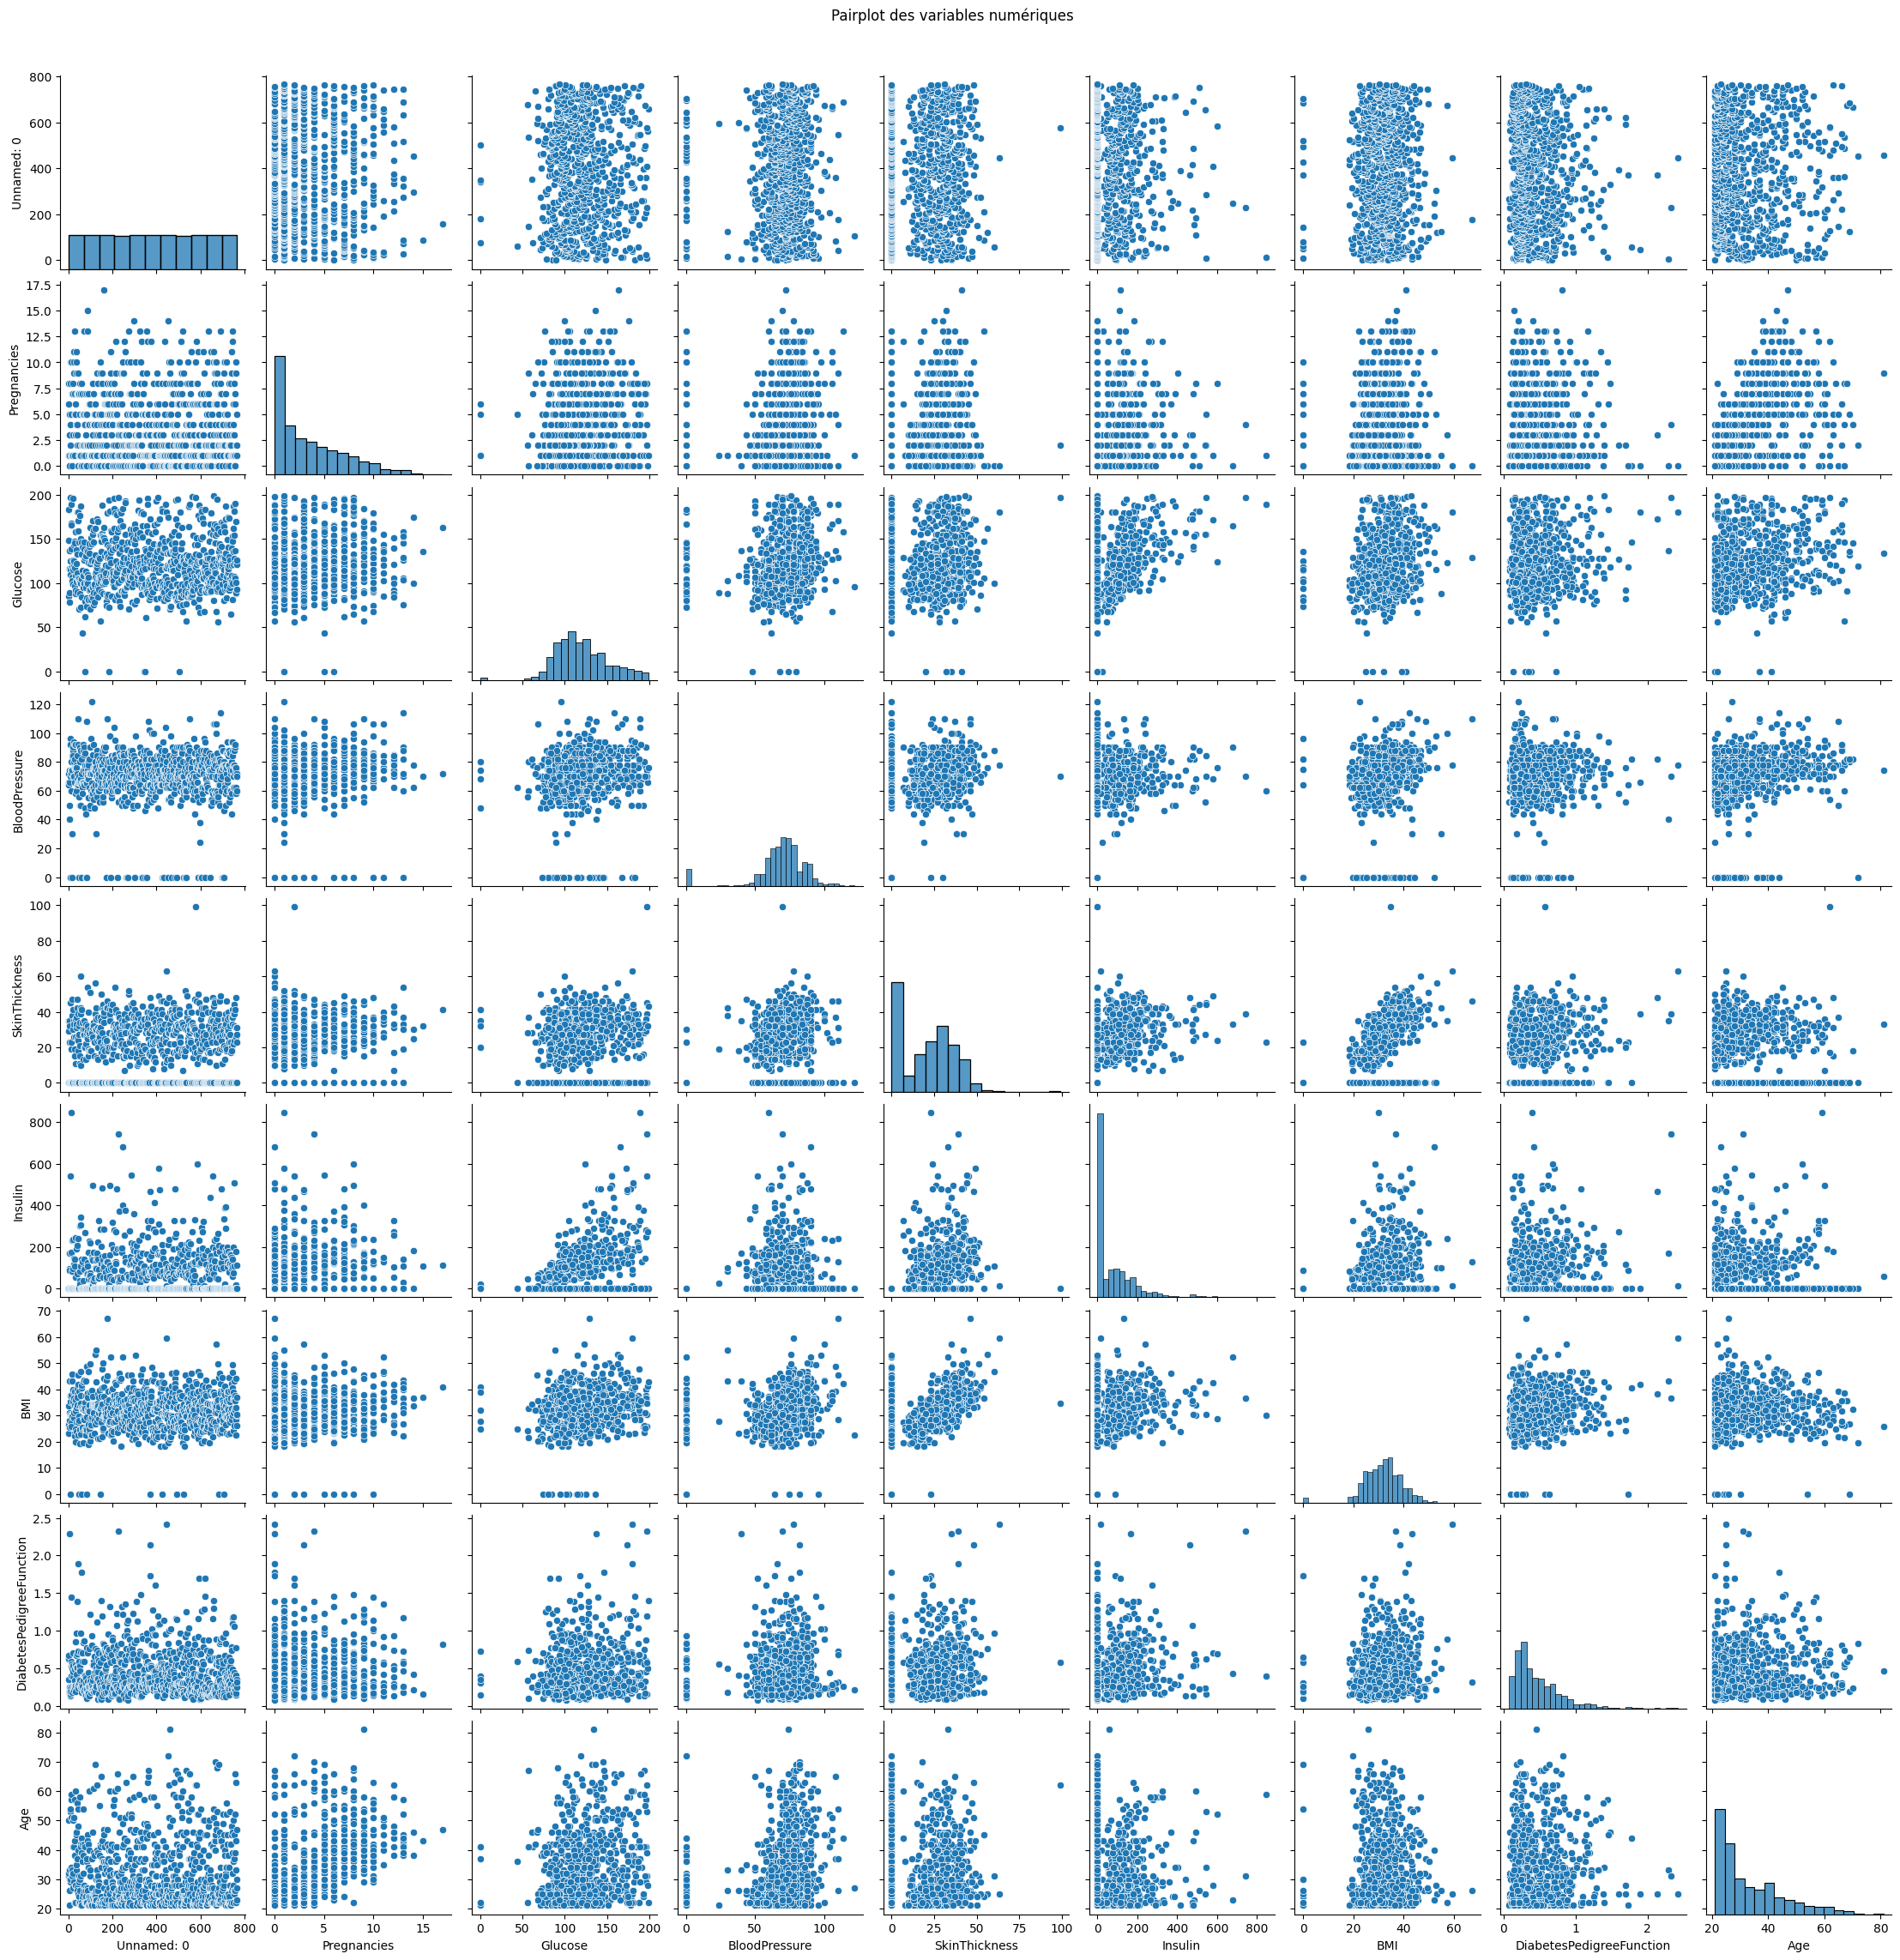

In [12]:
pairplot_fig = sbn.pairplot(dataset, height=2.5)
pairplot_fig.fig.suptitle("Pairplot des variables numériques", y=1.02)

##### ▶️ Etude des variables : 

In [13]:

# # ! Les fonction de visualisation ********************************************************************************************
# def visualization(data, column, lower_limit=None, upper_limit=None):
#     fig, axes = plt.subplots(1, 2, figsize=(18, 5))
    
#     # BoxPlot (avec des limites si définies)
#     sbn.boxplot(data=data, y=column, ax=axes[0], color="skyblue")
    
#     if upper_limit is not None:
#         axes[0].axhline(y=upper_limit, color="red", linestyle="--", linewidth=1, label=f"Limit sup:{upper_limit:.2f}") 
#     if lower_limit is not None:
#         axes[0].axhline(y=lower_limit, color="red", linestyle="--", linewidth=1, label=f"Limit sup:{lower_limit:.2f}") 
        
#     axes[0].set_title(f"Boxplot de {column}")
#     axes[0].legend()
    
#     # Histogramme avec KDE (et Limites si définies)
#     sbn.histplot(data[column], kde=True, ax=axes[1], color="orange")
    
#     if upper_limit is not None:
#         axes[1].axhline(y=upper_limit, color="red", linestyle="--", linewidth=1, label=f"Limit sup:{upper_limit:.2f}") 
#     if lower_limit is not None:
#         axes[1].axhline(y=lower_limit, color="red", linestyle="--", linewidth=1, label=f"Limit sup:{lower_limit:.2f}") 
        
#     axes[1].set_title(f"Distribution de {column}")
#     axes[1].legend()
    
#     # plt.title(f"La distribution de {column}")
    
#     plt.tight_layout()
#     plt.show()

# # ! ********************************************************************************************   

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


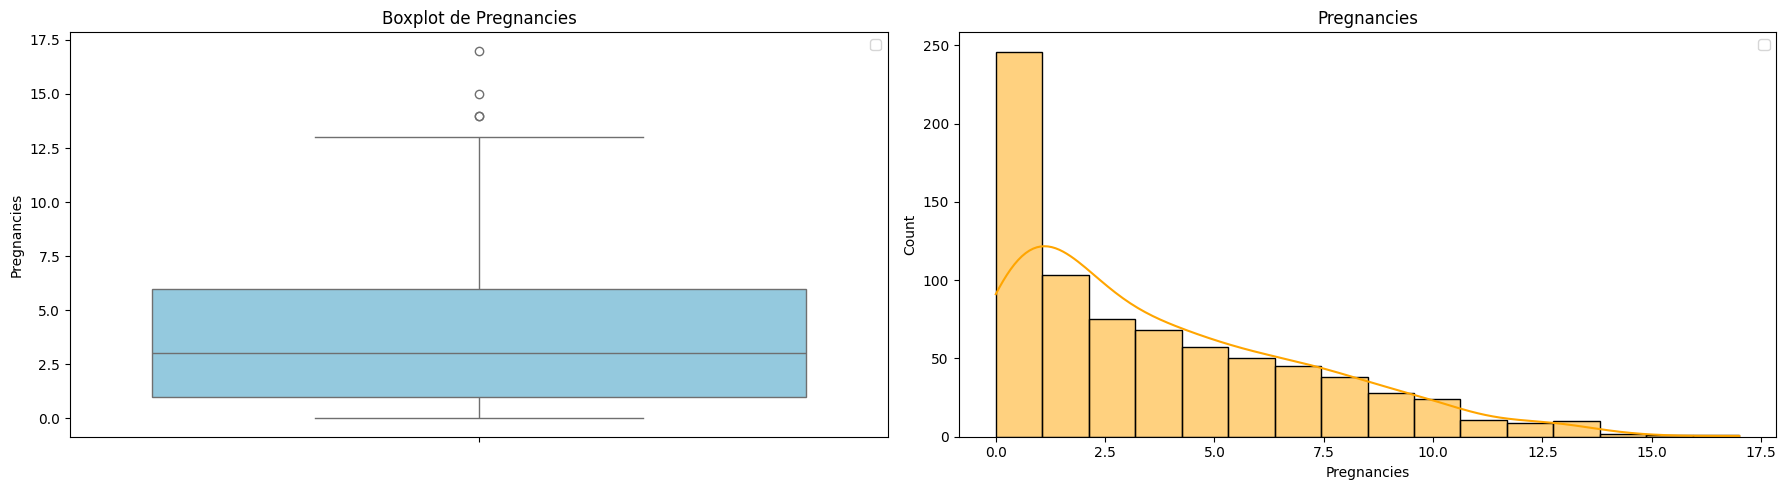

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


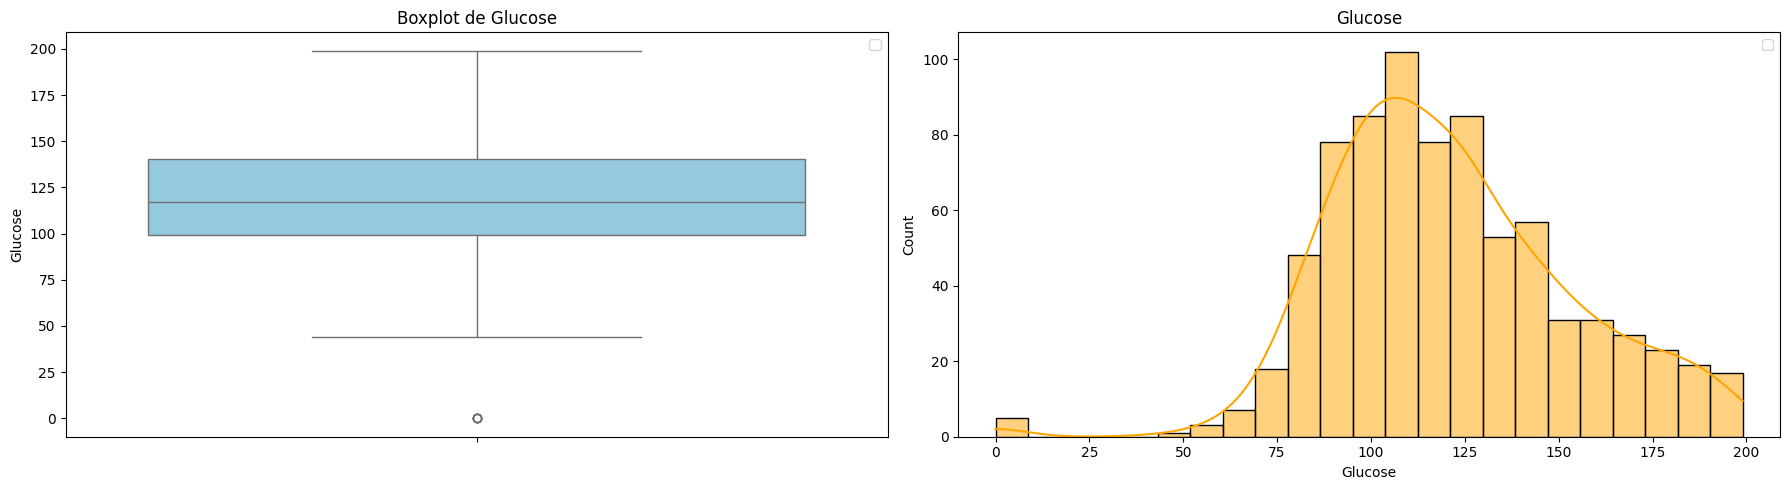

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


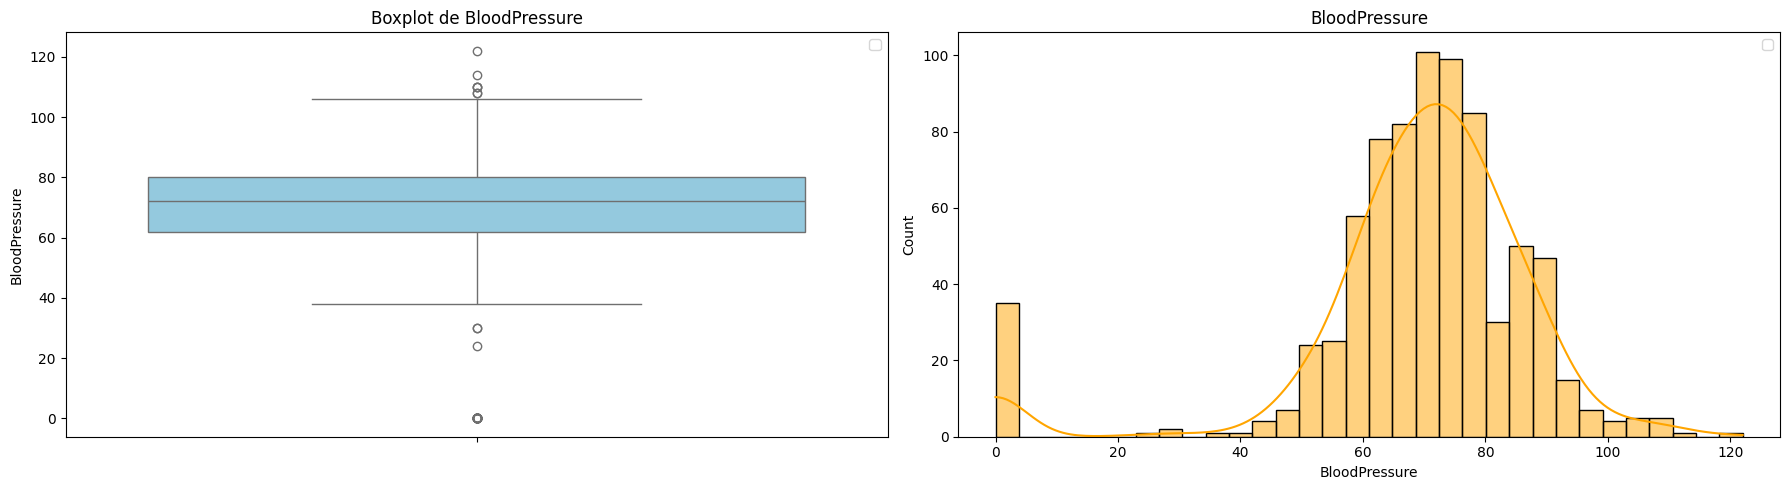

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


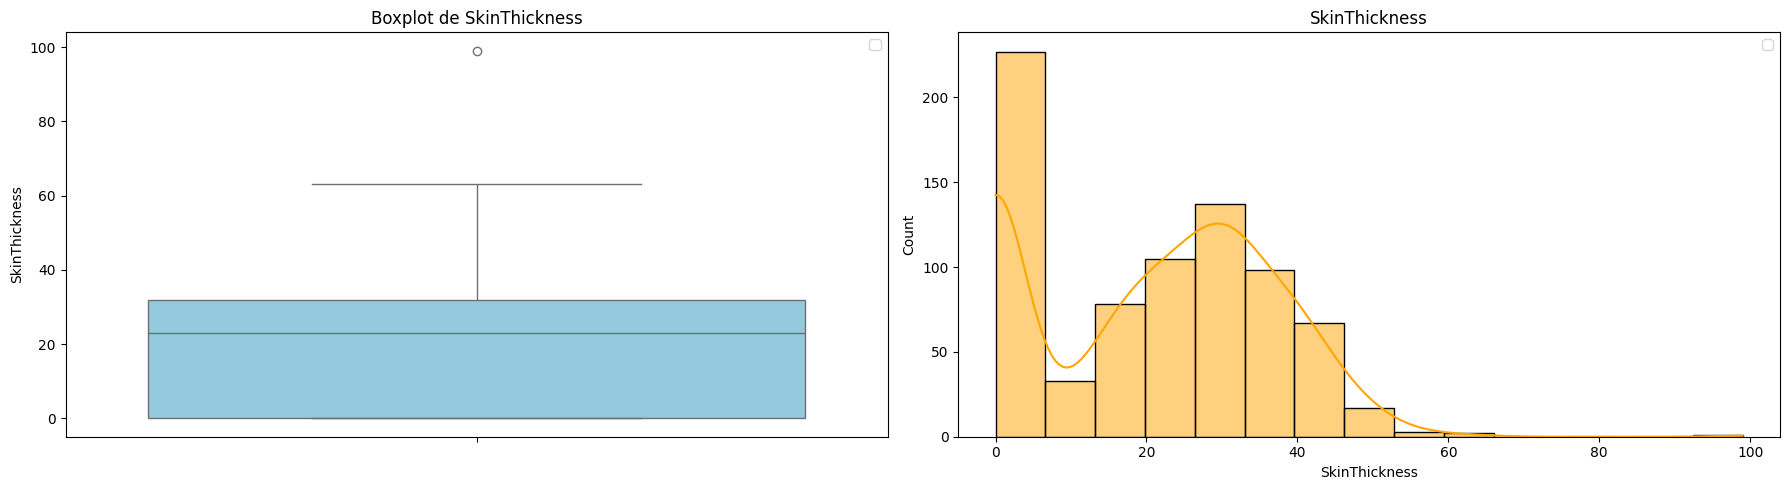

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


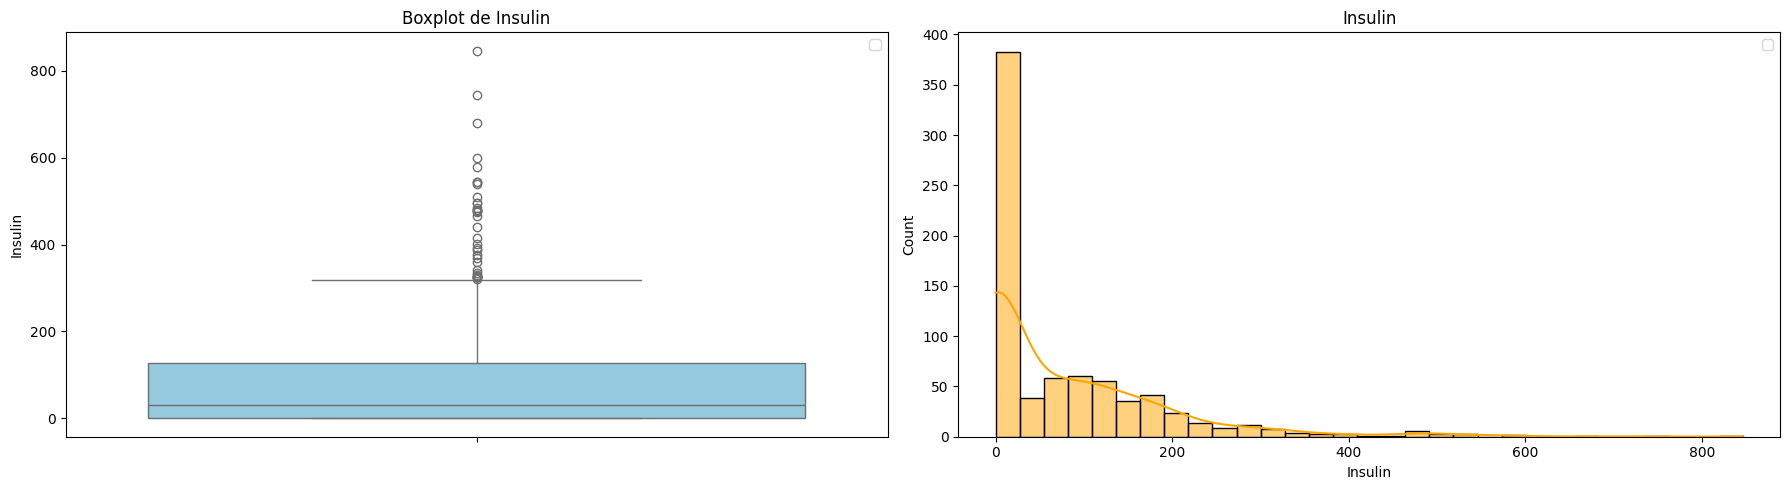

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


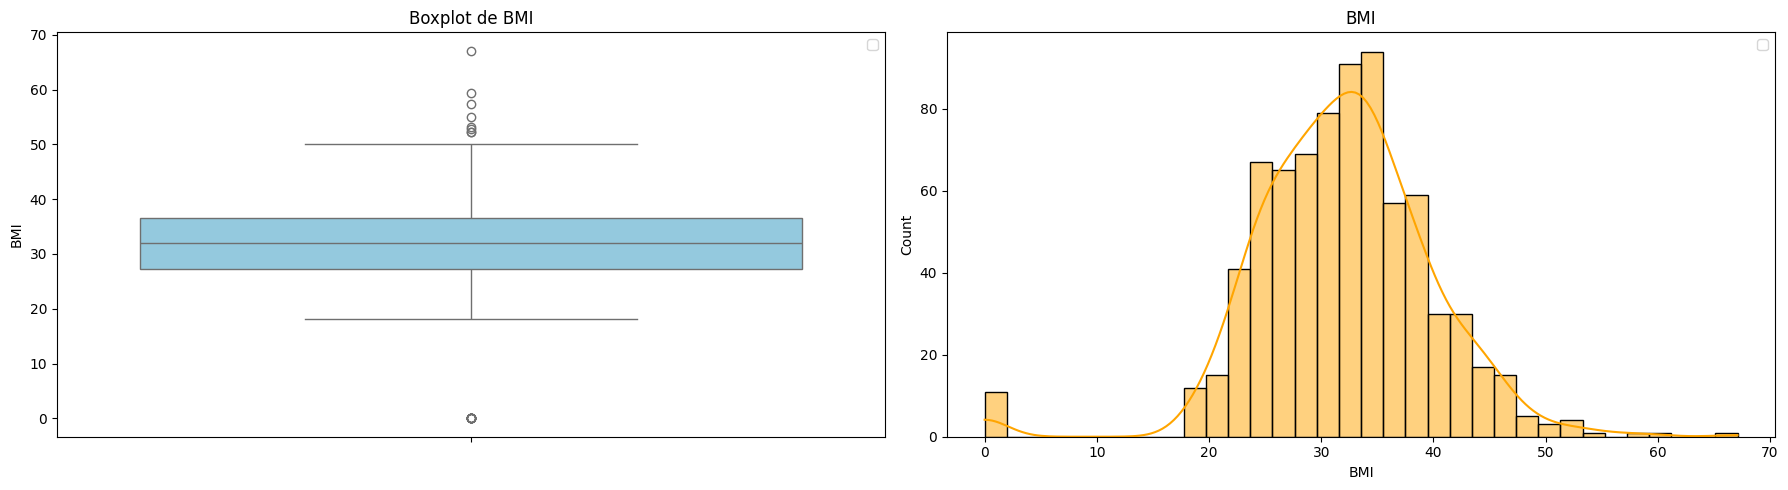

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


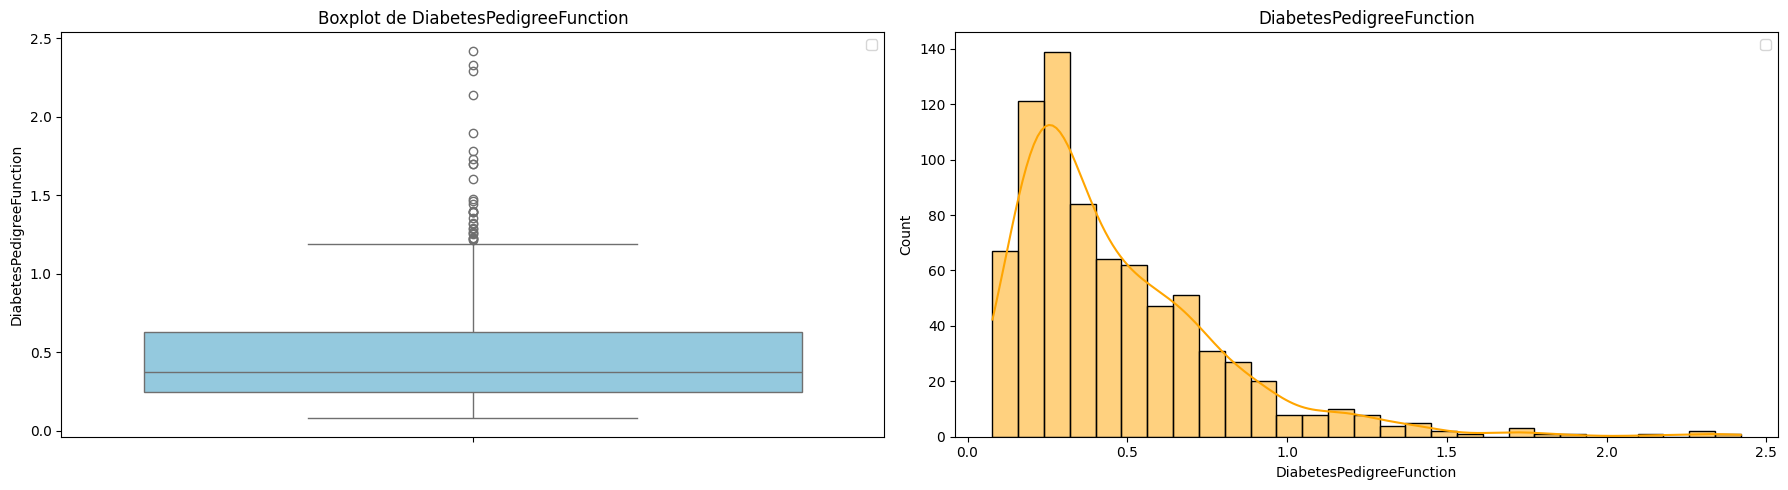

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


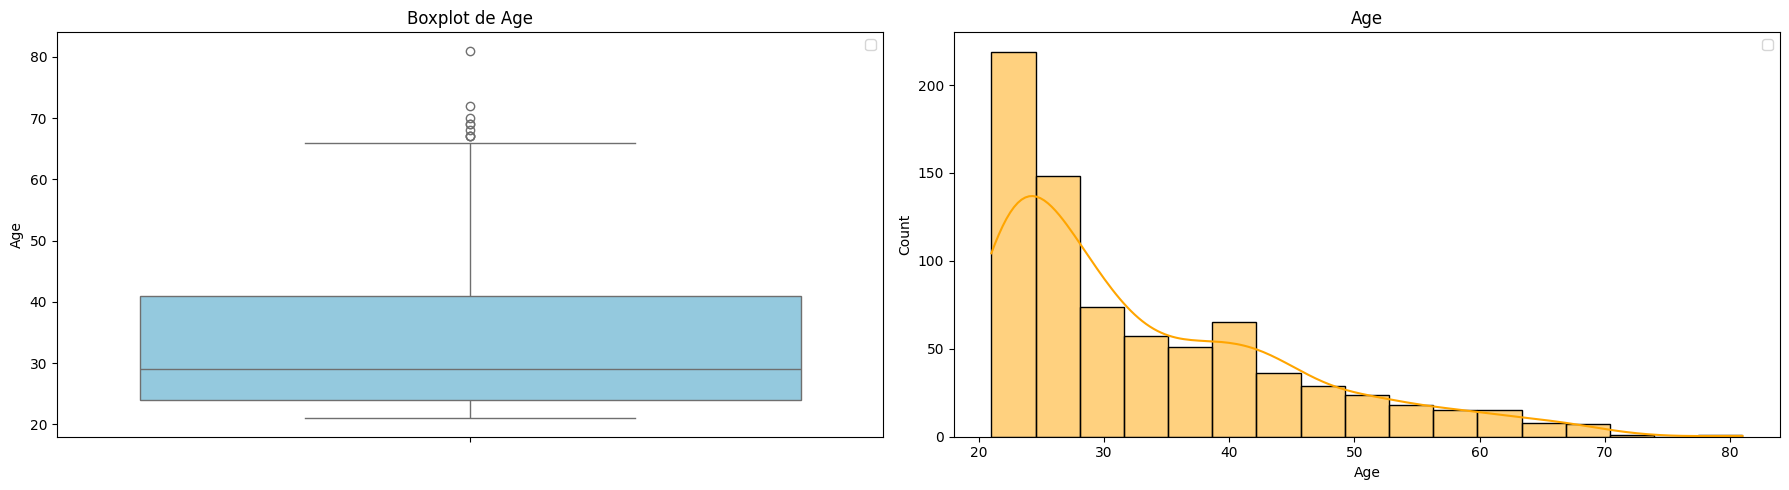

In [14]:
columns = list(dataset.columns)
for col in columns:
    if col != "Unnamed: 0":
        visualization(dataset, col)

In [15]:
dataset.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

* Relation Glucose / 'Insulin' avec régression linéaire

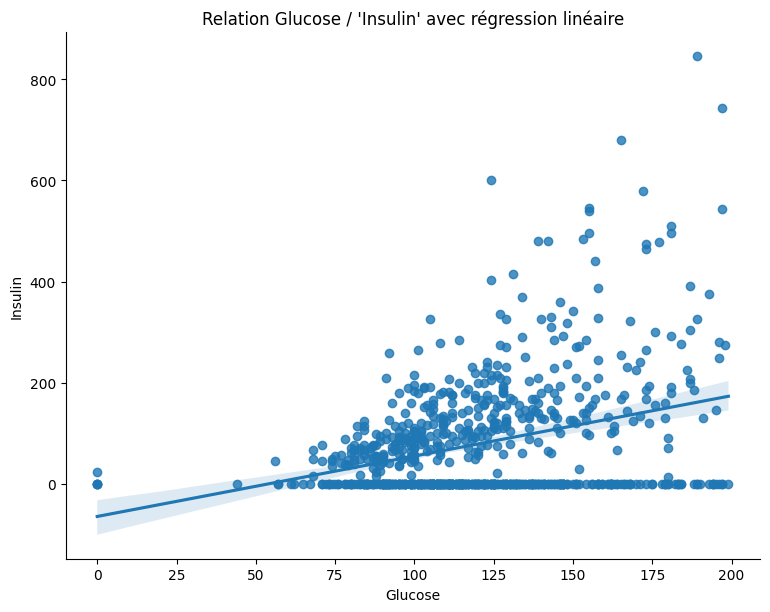

In [16]:
sbn.lmplot(data=dataset, x='Glucose', y='Insulin', height=6, aspect=1.3)
plt.title("Relation Glucose / 'Insulin' avec régression linéaire")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

* Relation BMI / 'SkinThickness' avec régression linéaire

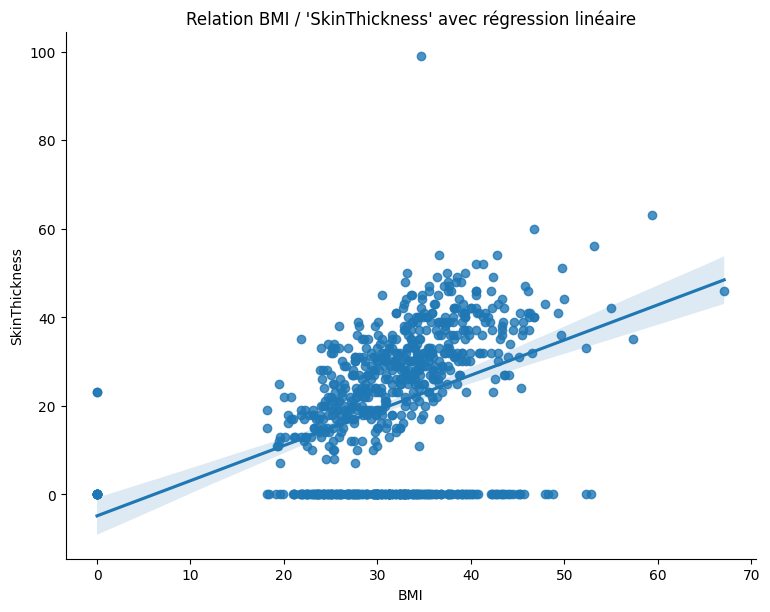

In [17]:
sbn.lmplot(data=dataset, x='BMI', y='SkinThickness', height=6, aspect=1.3)
plt.title("Relation BMI / 'SkinThickness' avec régression linéaire")
plt.xlabel("BMI")
plt.ylabel("SkinThickness")
plt.show()

* Relation Age / 'Pregnancies' avec régression linéaire

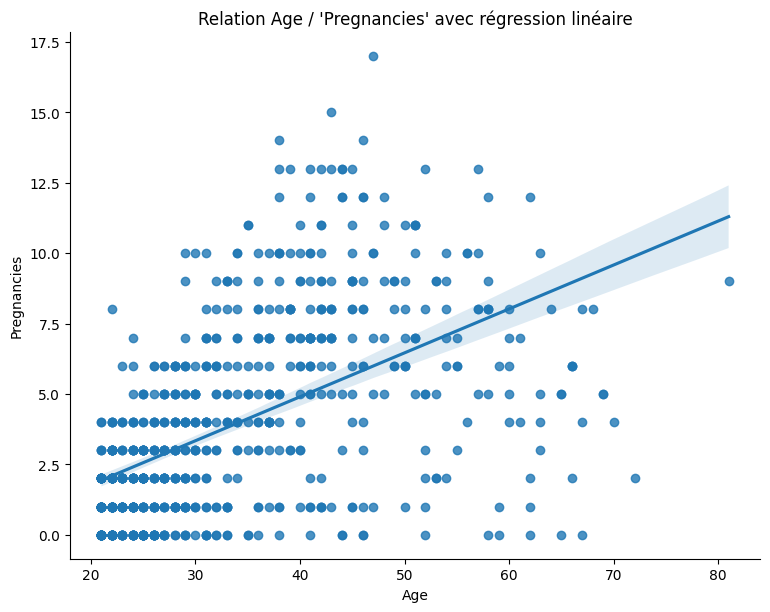

In [18]:
sbn.lmplot(data=dataset, x='Age', y='Pregnancies', height=6, aspect=1.3)
plt.title("Relation Age / 'Pregnancies' avec régression linéaire")
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.show()

* Relation BMI / 'Insulin' avec régression linéaire

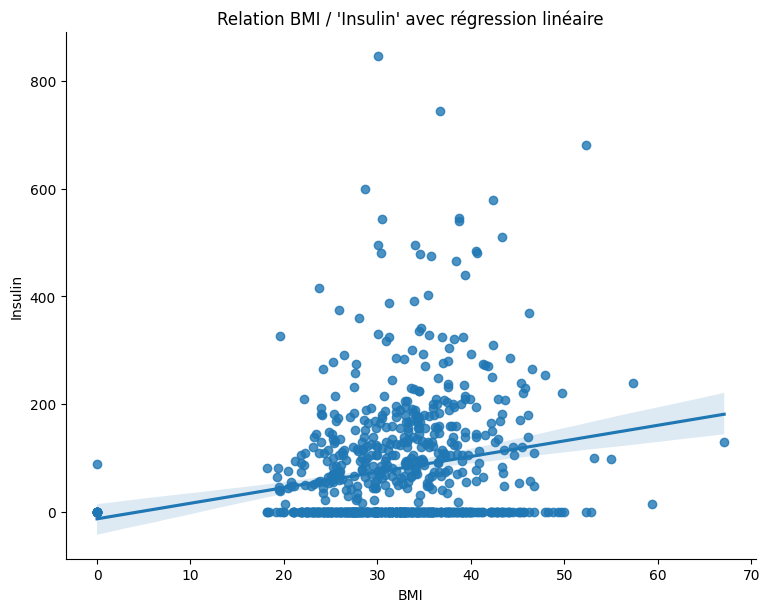

In [19]:
sbn.lmplot(data=dataset, x='BMI', y='Insulin', height=6, aspect=1.3)
plt.title("Relation BMI / 'Insulin' avec régression linéaire")
plt.xlabel("BMI")
plt.ylabel("Insulin")
plt.show()

### 4️⃣ Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations.

* La matrice de corrélation et de visualisation : 

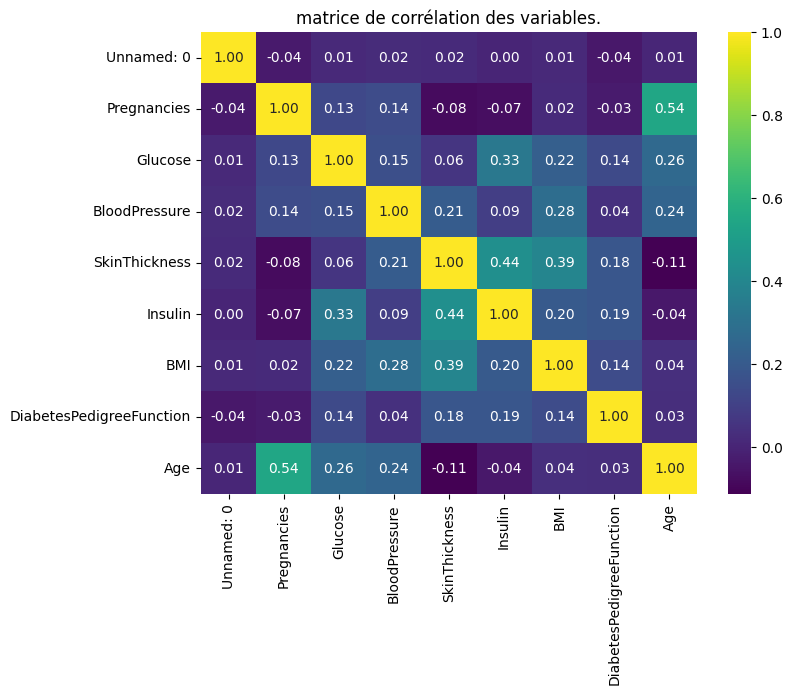

In [20]:
plt.figure(figsize=(8, 6))
sbn.heatmap(dataset.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("matrice de corrélation des variables.")
plt.show()

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse:collapse; font-family: Arial, sans-serif;">
  <thead style="background:#ffffff;">
    <tr>
      <th>Variables corrélées</th>
      <th>r</th>
      <th>Type de relation</th>
      <th>Interprétation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Age – Pregnancies</td>
      <td>0.54</td>
      <td>Forte</td>
      <td>Plus d’âge ➡️ plus de grossesses</td>
    </tr>
    <tr>
      <td>Insulin – SkinThickness</td>
      <td>0.44</td>
      <td>Modérée</td>
      <td>Obésité et résistance à l’insuline</td>
    </tr>
    <tr>
      <td>SkinThickness – BMI</td>
      <td>0.39</td>
      <td>Modérée</td>
      <td>Masse graisseuse</td>
    </tr>
    <tr>
      <td>Insulin – Glucose</td>
      <td>0.33</td>
      <td>Modérée</td>
      <td>Plus de glucose ➡️ plus d’insuline</td>
    </tr>
    <tr>
      <td>BMI – BloodPressure</td>
      <td>0.28</td>
      <td>Faible</td>
      <td>IMC élevé ➡️ tension plus élevée</td>
    </tr>
    <tr>
      <td>Glucose – Age</td>
      <td>0.26</td>
      <td>Faible</td>
      <td>Glycémie augmente avec l’âge</td>
    </tr>
    <tr>
      <td>BloodPressure – Age</td>
      <td>0.24</td>
      <td>Faible</td>
      <td>Tension augmente avec l’âge</td>
    </tr>
  </tbody>
</table>
